In [1]:
import pickle as pck
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from functions_PDF import pdf_creator3x3, pdf_creator3x3_indexs
from functions_MuonsNSAMP1 import DataFrame_muons
# from ROOT import TFile, TTree

## Configuración del estilo de las imágenes
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',
})

colorbar='jet'


In [2]:
######## Nueva definición de la elipcidad ############
# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_393_SOL_0.65_ELIP_0.65_NSIGMAS_13_dEDL_0_SIZE_250x539_KeV_.pkl'
# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_393_SOL_0.65_ELIP_0.65_NSIGMAS_13_DEDL_0_SIZE_250x539_KeV_n.pkl'
# path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_393_SOL_0.65_ELIP_0.65_NSIGMAS_13_DEDL_1100_SIZE_250x539_KeV_n.pkl'
path = './Diccionarios_Espetro_Muones/dict_muons_NSAMP324_Extensions_1_2_4_NIMGS_393_SOL_0.65_ELIP_0.65_NSIGMAS_13_DEDL_1400_SIZE_250x539_KeV_n.pkl'



histogram = open(path, 'rb')
data_histogram = pck.load(histogram)
histogram.close()

#### Visualizar las keys del diccionario ####
print('Las unidades de los datos están en: ', data_histogram['Energy_Units'])
print('Llaves principales del diccionario: ', data_histogram.keys())
print('Llaves secuandarias por extensión: ', data_histogram['extension_1'].keys(), end='\n\n')
# print(type(data_histogram['extension_1']['all_events']))
# data_muons_extension_1 = data_histogram['extension_1']
# data_muons_extension_2 = data_histogram['extension_2']
# data_muons_extension_4 = data_histogram['extension_4']
Ext = 2

n_muons = data_histogram['All_Muons_Detected']
print('Se detectaron ', n_muons, ' muones (contando las 3 extensiones)')
DF_muons, list_datamask = DataFrame_muons(data_histogram, extension=Ext)

Las unidades de los datos están en:  2
Llaves principales del diccionario:  dict_keys(['Num_Images', 'All_Muons_Detected', 'Energy_Units', 'Elipticity', 'Solidity', 'Fit_errors', 'extension_1', 'extension_2', 'extension_4'])
Llaves secuandarias por extensión:  dict_keys(['charge', 'deltaEL', 'deltaL', 'all_events', 'theta', 'phi', 'gain', 'elip', 'sol', 'all_events_elip', 'all_events_sol', 'datamasked'])

Se detectaron  2833  muones (contando las 3 extensiones)


,Gain (ADU/e-),Solidity,Elipticity,Theta (Deg),Phi (Deg),Charge (KeV),l (cm),dEdL (KeV/cm)
Muon ID,,,,,,,,
155,218.025131,0.694853,0.870814,45.974244,194.866915,191.681,0.104319,1837.445244


Shape (Y, X):  (12, 50)


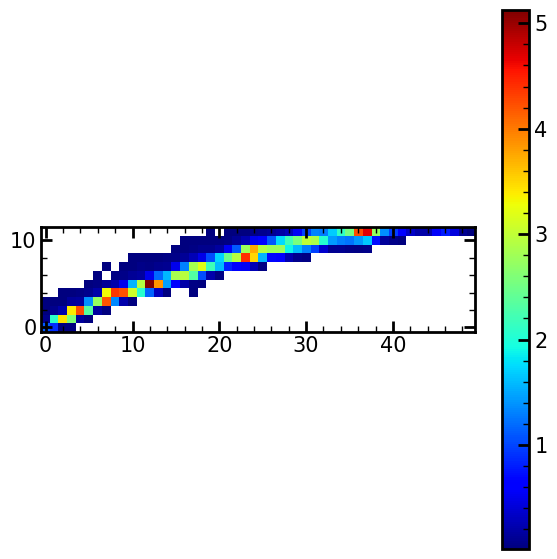

In [7]:
n_label = 155

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=[7,7])
x1 = axs.imshow(list_datamask[n_label], cmap=colorbar)
fig.colorbar(x1, ax=axs)

display(DF_muons.iloc[[n_label]])
print('Shape (Y, X): ', list_datamask[n_label].shape)
plt.show()

In [4]:
Ext = 1
DF_muons, list_datamask = DataFrame_muons(data_histogram, extension=Ext)

list_newmatrix = []
list_indexs =[]
# range_in_phi = DF_muons[DF_muons['Phi (Deg)'].between(165, 195)]
range_in_phi = DF_muons[DF_muons['Phi (Deg)'].between(165, 195)]

for index in range_in_phi.index:
    # print(index)
    list_newmatrix.append(list_datamask[index])
    list_indexs.append(index)

# plt.imshow(list_newmatrix[0])
PDF_name = 'Muons_PHI_BETWEEN_165-195_EXT1_DEDL_1400.pdf'
pdf_creator3x3_indexs(PDF_name, list_newmatrix, list_indexs)


The PDF is being created
196  muons will be display
Done


0

# Creación de PDF para todos los muones de una extensión

In [ ]:
n_label = 100

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=[7,7])
axs[0,0].imshow(list_datamask[n_label], cmap=colorbar)
axs[0,0].set_title('ID: ' + str(n_label))

axs[0,1].imshow(list_datamask[n_label+1], cmap=colorbar)
axs[0,1].set_title('ID: ' + str(n_label+1))

axs[0,2].imshow(list_datamask[n_label+2], cmap=colorbar)
axs[0,2].set_title('ID: ' + str(n_label+2))

axs[1,0].imshow(list_datamask[n_label+3], cmap=colorbar)
axs[1,0].set_title('ID: ' + str(n_label+3))

axs[1,1].imshow(list_datamask[n_label+4], cmap=colorbar)
axs[1,1].set_title('ID: ' + str(n_label+4))

axs[1,2].imshow(list_datamask[n_label+5], cmap=colorbar)
axs[1,2].set_title('ID: ' + str(n_label+5))

axs[2,0].imshow(list_datamask[n_label+6], cmap=colorbar)
axs[2,0].set_title('ID: ' + str(n_label+6))

axs[2,1].imshow(list_datamask[n_label], cmap=colorbar)
axs[2,1].set_title('ID: ' + str(n_label+7))

axs[2,2].imshow(list_datamask[n_label+8], cmap=colorbar)
axs[2,2].set_title('ID: ' + str(n_label+8))

plt.tight_layout()
plt.show()

In [ ]:
Ext = 1  # Only change this value and the PDF_name

DF_muons, list_datamask = DataFrame_muons(data_histogram, extension=Ext)

# list_datamask = list_datamask[:50]
print('Len: ', len(list_datamask))
### Creación del PDF con el nombre ##
PDF_name = 'Prueba1.pdf'
c = canvas.Canvas(PDF_name, letter)
w, h = A4 ## dimensiones del formato

### Imagen provicional ###
path_image = 'Perfil_Muon.jpg'
color_matrix = [0.4, 0.4470, 0.2410]
coord3x3 = [[0,0],[0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2]]
n_last_events = 0

# for extension in (1,2,4):
# c.drawString(50, h - 50, 'Extensión ' + str(Ext)) 
n_muonstot = len(list_datamask)
n_last_events = 0
n_events = 0


fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [6,6], facecolor = color_matrix) ## Las hojas tendrán 9 muones
num_pages = 0
# c.showPage()

if (n_muonstot%9) == 0:
    # print('Hola')
    for index in range(0, len(list_datamask)):
        n_muonstot = n_muonstot - 1
        n_events = n_events + 1
        if n_events < 10: 
            # print('n_events: ', n_events)
            axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(list_datamask[index], cmap = colorbar)
            axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_title('ID: ' + str(index))

            if n_events == 9:
                n_events = 10
        
        if n_events == 10:
            n_events = 0
            num_pages = num_pages + 1
            fig.savefig(path_image)
            img = ImageReader(path_image)

            # Obtener el ancho y alto de la imagen.
            img_w, img_h = img.getSize()

            # h - img_h es el alto de la hoja menos el alto de la imagen.
            c.drawImage(img, w - img_w + 10, h - img_h - 90)
            c.drawString(w/2, 40, str(num_pages))
            c.showPage()
            # plt.imshow(event)
            # plt.show()
            plt.close()
            ! rm Perfil_Muon.jpg

            fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [6,6], facecolor = color_matrix)

elif (n_muonstot%9) != 0:
    # print('No Hola')
    Resto = n_muonstot%9

    for index in range(0, len(list_datamask)):
        n_muonstot = n_muonstot - 1
        n_events = n_events + 1

        if n_muonstot >= Resto:
            print('Primera condicion')
            if n_events < 10: 
                # print('n_events: ', n_events)
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(list_datamask[index], cmap = colorbar)
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_title('ID: ' + str(index))

                if n_events == 9:
                    n_events = 10

            if n_events == 10:
                print('Estoy aqui')
                n_events = 0
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()
                print('Aqui ', img_w)

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w+10, h - img_h-90)
                c.drawString(w/2, 40, str(num_pages))
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

                fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [6,6], facecolor = color_matrix)

        elif n_muonstot<Resto:
            print('Segunda condicion')
            n_last_events = n_last_events + 1

            axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].imshow(list_datamask[index], cmap=colorbar)
            axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].set_title('ID: ' + str(index))

            if n_muonstot == 0:
                # plt.show()
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages))
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

                fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)
        
plt.close()
c.save()

Len:  1361
No Hola
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Estoy aqui
Aqui  600
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Estoy aqui
Aqui  600
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Estoy aqui
Aqui  600
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Estoy aqui
Aqui  600
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Primera condicion
Estoy aqui
Aqui  600
Primera condicion
Primera condicion
Primera condicion
Primera cond